## Importing Libraries

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier



## Importing CSV files

In [2]:
data_df = pd.read_csv("faults.csv")


In [3]:
data_df.head(10)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
5,430,441,100250,100337,630,20,87,62357,64,127,...,0.8736,-0.2267,0.9874,1,0,0,0,0,0,0
6,413,446,138468,138883,9052,230,432,1481991,23,199,...,0.9205,0.2791,1.0000,1,0,0,0,0,0,0
7,190,200,210936,210956,132,11,20,20007,124,172,...,0.5000,0.1841,0.3359,1,0,0,0,0,0,0
8,330,343,429227,429253,264,15,26,29748,53,148,...,0.5000,-0.1197,0.5593,1,0,0,0,0,0,0
9,74,90,779144,779308,1506,46,167,180215,53,143,...,0.9024,-0.0651,1.0000,1,0,0,0,0,0,0


In [0]:
print("Data Description:")
print(data_df.describe())
print("The first 5 rows of the dataset:")
data_df.head(5)

Data Description:
         X_Minimum    X_Maximum  ...        Bumps  Other_Faults
count  1941.000000  1941.000000  ...  1941.000000   1941.000000
mean    571.136012   617.964451  ...     0.207110      0.346728
std     520.690671   497.627410  ...     0.405339      0.476051
min       0.000000     4.000000  ...     0.000000      0.000000
25%      51.000000   192.000000  ...     0.000000      0.000000
50%     435.000000   467.000000  ...     0.000000      0.000000
75%    1053.000000  1072.000000  ...     0.000000      1.000000
max    1705.000000  1713.000000  ...     1.000000      1.000000

[8 rows x 34 columns]
The first 5 rows of the dataset:


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [0]:
#splitting the dataframe into 60:20:20 ratio
train_df, valid_df, test_df = np.split(data_df.sample(frac=1), [int(.6*len(data_df)), int(.8*len(data_df))])
train_df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1164.000000,1164.000000,1.164000e+03,1.164000e+03,1164.000000,1164.000000,1164.000000,1.164000e+03,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,574.674399,621.118557,1.600749e+06,1.600794e+06,1867.577320,109.051546,75.159794,2.079929e+05,84.756873,130.783505,1460.267182,0.386598,0.613402,79.073024,0.333025,0.413402,0.584194,0.033057,0.611344,0.811230,0.574742,2.486461,1.334149,1.398289,0.080770,-0.127055,0.581565,0.083333,0.088488,0.206186,0.035223,0.025773,0.212199,0.348797
std,524.056773,499.732327,1.732613e+06,1.732612e+06,3969.358656,192.743114,118.811231,4.577099e+05,32.748425,19.059833,144.158912,0.487180,0.487180,54.736300,0.299983,0.138604,0.275469,0.055779,0.243312,0.236891,0.482272,0.793541,0.483800,0.456474,0.492340,0.150683,0.338245,0.276504,0.284125,0.404739,0.184423,0.158526,0.409041,0.476795
min,0.000000,4.000000,9.007000e+03,9.033000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.009000,0.001500,0.064500,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,193.000000,4.583250e+05,4.583428e+05,85.000000,15.000000,13.000000,9.568000e+03,61.750000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.317450,0.368325,0.006600,0.405475,0.588725,0.000000,1.929400,1.000000,1.079200,-0.273500,-0.195725,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,447.500000,473.000000,1.179279e+06,1.179512e+06,177.500000,25.000000,24.500000,1.938050e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.226800,0.410300,0.583300,0.010100,0.636400,0.950000,1.000000,2.249200,1.176100,1.311600,0.090350,-0.126300,0.500400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1051.500000,1069.750000,2.138803e+06,2.138826e+06,757.250000,83.000000,82.000000,7.503475e+04,107.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.579450,0.500900,0.842525,0.023600,0.800000,1.000000,1.000000,2.879250,1.518500,1.740400,0.490825,-0.064075,0.999725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1688.000000,1712.000000,1.291703e+07,1.291709e+07,25473.000000,1193.000000,709.000000,3.061597e+06,195.000000,253.000000,1715.000000,1.000000,1.000000,300.000000,0.990500,0.888800,1.000000,0.622600,1.000000,1.000000,1.000000,4.406100,2.933500,2.776000,0.955200,0.591700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
print("Training Data Information:")
train_df.info()

Training Data Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164 entries, 822 to 974
Data columns (total 34 columns):
X_Minimum                1164 non-null int64
X_Maximum                1164 non-null int64
Y_Minimum                1164 non-null int64
Y_Maximum                1164 non-null int64
Pixels_Areas             1164 non-null int64
X_Perimeter              1164 non-null int64
Y_Perimeter              1164 non-null int64
Sum_of_Luminosity        1164 non-null int64
Minimum_of_Luminosity    1164 non-null int64
Maximum_of_Luminosity    1164 non-null int64
Length_of_Conveyer       1164 non-null int64
TypeOfSteel_A300         1164 non-null int64
TypeOfSteel_A400         1164 non-null int64
Steel_Plate_Thickness    1164 non-null int64
Edges_Index              1164 non-null float64
Empty_Index              1164 non-null float64
Square_Index             1164 non-null float64
Outside_X_Index          1164 non-null float64
Edges_X_Index            1164 non-null float64


## To check if any data is actually missing

In [0]:
total = data_df.isnull().sum().sort_values(ascending=False)
percent_1 = data_df.isnull().sum()/data_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Other_Faults,0,0.0
Minimum_of_Luminosity,0,0.0
Edges_Index,0,0.0
Steel_Plate_Thickness,0,0.0
TypeOfSteel_A400,0,0.0


There are no null values, so no need to impute any values

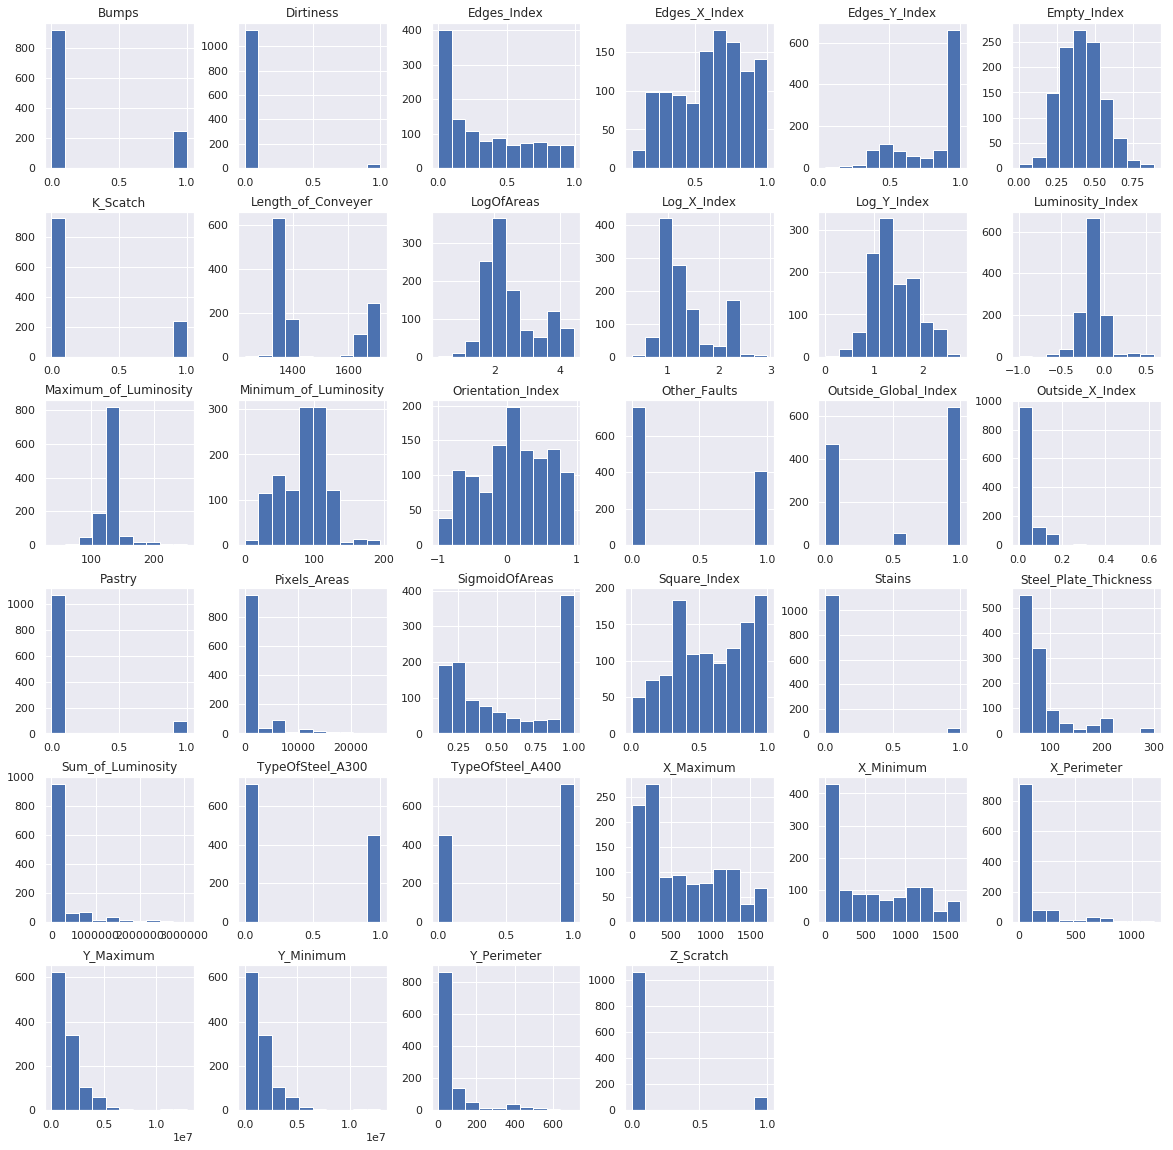

In [0]:
train_df.hist(figsize=(20,20))
plt.show()

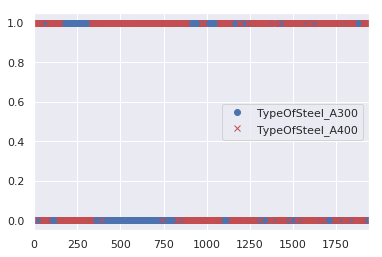

In [0]:
train_df[["TypeOfSteel_A300","TypeOfSteel_A400"]].plot(style=['o','rx'])

Looks like the 2 types are complimentary, either Red and Blue are always opposite. Lets be sure about that from the following code:

In [0]:
if(np.unique(train_df["TypeOfSteel_A300"]+train_df["TypeOfSteel_A400"])==1):
  print("Type A300 and A400 are complimentary")
else:
  print("Types are not complimentary")


Type A300 and A400 are complimentary


This is a One Hot Encoding, need to make one column out of it:

In [0]:
# as the two types are complimentary, we are merging them in train, test and valid

train_df = train_df.drop("TypeOfSteel_A300",axis=1)
train_df.rename(columns = {'TypeOfSteel_A400':'TypeofSteel'}, inplace = True) # 0: A300, 1: A400

valid_df = valid_df.drop("TypeOfSteel_A300",axis=1)
valid_df.rename(columns = {'TypeOfSteel_A400':'TypeofSteel'}, inplace = True) # 0: A300, 1: A400

test_df = test_df.drop("TypeOfSteel_A300",axis=1)
test_df.rename(columns = {'TypeOfSteel_A400':'TypeofSteel'}, inplace = True) # 0: A300, 1: A400

train_df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeofSteel,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
822,1327,1332,1647908,1647954,144,20,47,17271,110,132,1354,1,40,0.0325,0.3739,0.1087,0.0037,0.2500,0.9787,1.0,2.1584,0.6990,1.6628,0.8913,-0.0630,0.3819,0,0,0,0,1,0,0
1405,662,670,781434,781444,66,10,10,7181,89,123,1687,0,80,0.7848,0.1750,0.8000,0.0047,0.8000,1.0000,1.0,1.8195,0.9031,1.0000,0.2000,-0.1500,0.1852,0,0,0,0,0,0,1
1795,1206,1216,1802452,1802460,67,11,8,7164,92,124,1362,0,120,0.2144,0.1625,0.8000,0.0073,0.9091,1.0000,0.0,1.8261,1.0000,0.9031,-0.2000,-0.1646,0.1852,0,0,0,0,0,0,1
432,43,214,1164302,1164475,14969,805,503,1758655,27,142,1400,1,40,0.0614,0.4940,0.9884,0.1221,0.2124,0.3439,1.0,4.1752,2.2330,2.2380,0.0116,-0.0821,1.0000,0,0,1,0,0,0,0
1907,122,146,203252,203261,95,33,22,12566,124,143,1362,1,40,0.1792,0.5602,0.3750,0.0176,0.7273,0.4091,0.0,1.9777,1.3802,0.9542,-0.6250,0.0334,0.3601,0,0,0,0,0,0,1


Converting the One Hot Encoding of all the 7 faults into a single column "label"

In [0]:
name=["Training","Validation","Testing"]
dataset=[train_df,valid_df,test_df]
label_code={0:"Pastry",1:"Z_Scratch",2:"K_Scatch",3:"Stains",4:"Dirtiness",5:"Bumps",6:"Other_Faults"}
i=0
for data in dataset:
  data["label"]=0
  
  data.loc[data['Pastry'] == 1, 'label'] = 0
  data.loc[data['Z_Scratch'] == 1, 'label'] = 1
  data.loc[data['K_Scatch'] == 1, 'label'] = 2
  data.loc[data['Stains'] == 1, 'label'] = 3
  data.loc[data['Dirtiness'] == 1, 'label'] = 4
  data.loc[data['Bumps'] == 1, 'label'] = 5
  data.loc[data['Other_Faults'] == 1, 'label'] = 6
  data=data.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"], axis=1)
  print("5 samples of "+name[i]+" dataset now:")
  i=i+1
  print(data.head())

5 samples of Training dataset now:
      X_Minimum  X_Maximum  Y_Minimum  ...  Luminosity_Index  SigmoidOfAreas  label
822        1327       1332    1647908  ...           -0.0630          0.3819      4
1405        662        670     781434  ...           -0.1500          0.1852      6
1795       1206       1216    1802452  ...           -0.1646          0.1852      6
432          43        214    1164302  ...           -0.0821          1.0000      2
1907        122        146     203252  ...            0.0334          0.3601      6

[5 rows x 27 columns]
5 samples of Validation dataset now:
      X_Minimum  X_Maximum  Y_Minimum  ...  Luminosity_Index  SigmoidOfAreas  label
978         828        837    2451285  ...           -0.0547          0.2051      5
1629        823        830     176554  ...           -0.3077          0.1965      6
1449       1155       1166     476876  ...           -0.1668          0.2300      6
1360        505        522    1998060  ...           -0.0601     

# how the label 5,6,6,2 are coming(doing one hot encoding binary 0 and 1)

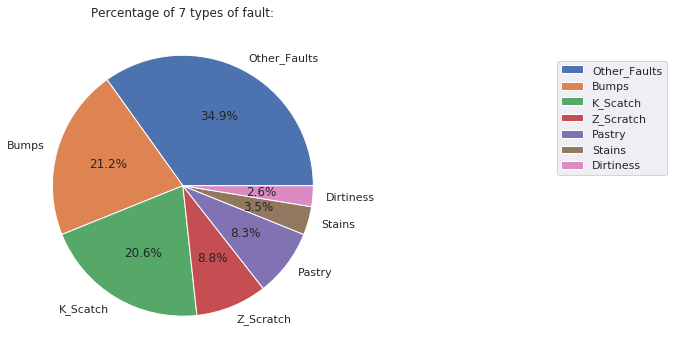

In [0]:
code,count=train_df["label"].value_counts().index,train_df["label"].value_counts().values
x,y=[label_code[i] for i in code],count

sns.set(rc={'figure.figsize':(8,6)})
ax = plt.pie(y, labels=x,autopct='%1.1f%%')
ax = plt.legend(loc="best", bbox_to_anchor=(2.0, 0.9, 0, 0))
ax = plt.title("Percentage of 7 types of fault:")



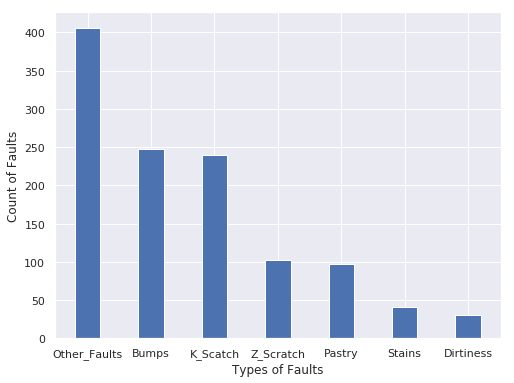

In [0]:
plt.bar(x,y,align='center',width=0.4) # A bar chart
plt.xlabel('Types of Faults')
plt.ylabel('Count of Faults')
plt.show()

As can be seen, "Other_Faults" and "Bumps" are the highest. The above Histogram shows the faults in descending order.

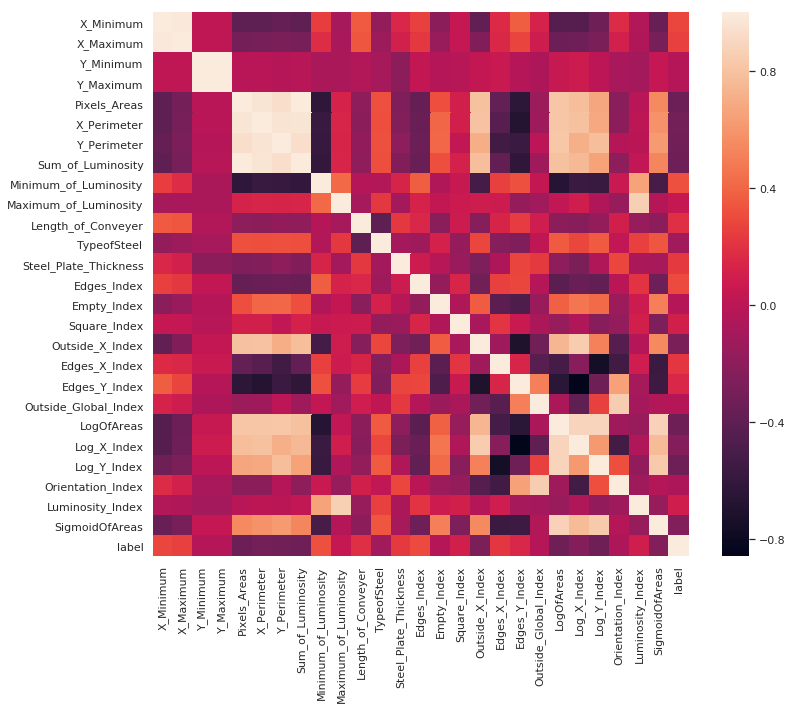

In [0]:
sns.set(rc={'figure.figsize':(12,10)})
corr = train_df.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"], axis=1).corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

From the above heat map, it looks like the following features have high co-relation (lighter shade) with "label":


*   X_Minimum
*   X_Maximum

*   Minimum_of_Luminosity
*   Length_of_Conveyor

*   Steel_Plate_Thickness
*   Edges_Index
*   Edges_X_Index







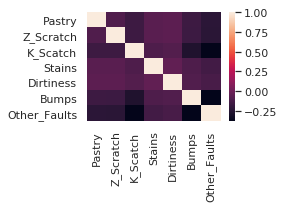

In [0]:
sns.set(rc={'figure.figsize':(3,2)})
corr = train_df[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]].corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

The 7 faults (labels) do not have any mentionable co-relation amongst each other.

***(X_Minimum and X_Maximum) and (Y_Minimum and Y_Maximum) are highly correlated and hence we will take X_Avg and Y_Avg instead to capture both the info. Also, Avg_Luminosity will take place of Minimum_of_Luminosity and Maximum_of_Luminosity.***

In [0]:
tr_f,v_f,te_f=train_df,valid_df,test_df

In [0]:
train_df,valid_df,test_df=tr_f,v_f,te_f

In [0]:
print("The size of the Training set before change is ",train_df.shape)
train_df["X_Avg"] = (train_df["X_Minimum"]+train_df["X_Maximum"])/2
train_df["Y_Avg"] = (train_df["Y_Minimum"]+train_df["Y_Maximum"])/2
train_df["Avg_Luminosity"] = (train_df["Minimum_of_Luminosity"]+train_df["Maximum_of_Luminosity"])/2
train_df = train_df.drop(["X_Minimum","X_Maximum","Y_Minimum","Y_Maximum","Minimum_of_Luminosity","Maximum_of_Luminosity"],axis=1)
print("The size of the Training set after modification is ",train_df.shape)
print("---------------------------------------------------------------------")
print("The size of the Validation set before change is ",valid_df.shape)
valid_df["X_Avg"] = (valid_df["X_Minimum"]+valid_df["X_Maximum"])/2
valid_df["Y_Avg"] = (valid_df["Y_Minimum"]+valid_df["Y_Maximum"])/2
valid_df["Avg_Luminosity"] = (valid_df["Minimum_of_Luminosity"]+valid_df["Maximum_of_Luminosity"])/2
valid_df = valid_df.drop(["X_Minimum","X_Maximum","Y_Minimum","Y_Maximum","Minimum_of_Luminosity","Maximum_of_Luminosity"],axis=1)
print("The size of the Validation set after modification is ",valid_df.shape)
print("-------------------------------------------------------------")
print("The size of the Training set before change is ",test_df.shape)
test_df["X_Avg"] = (test_df["X_Minimum"]+test_df["X_Maximum"])/2
test_df["Y_Avg"] = (test_df["Y_Minimum"]+test_df["Y_Maximum"])/2
test_df["Avg_Luminosity"] = (test_df["Minimum_of_Luminosity"]+test_df["Maximum_of_Luminosity"])/2
test_df = test_df.drop(["X_Minimum","X_Maximum","Y_Minimum","Y_Maximum","Minimum_of_Luminosity","Maximum_of_Luminosity"],axis=1)
print("The size of the Training set after modification is ",test_df.shape)

The size of the Training set before change is  (1164, 34)
The size of the Training set after modification is  (1164, 31)
---------------------------------------------------------------------
The size of the Validation set before change is  (388, 34)
The size of the Validation set after modification is  (388, 31)
-------------------------------------------------------------
The size of the Training set before change is  (389, 34)
The size of the Training set after modification is  (389, 31)


In [0]:
train_df.shape

(1164, 31)

***X_Perimeter, Y_Perimeter and Sum_of_Luminosity are highly correalated to Pixel_Areas, so will keep only Pixel_Areas.
Outside_X_Index is highly correlated to many other features, hence dropping it.
Outside_Global_Index is highly correlated to Orientation_Index, hence dropping it.
SigmoidOfAreas, Log_X_Index and Log_Y_Index are highly correlated to LogOfAreas, hence dropping them.***  

In [0]:
print("The size of the Training set before change is ",train_df.shape)  
train_df = train_df.drop(["X_Perimeter","Y_Perimeter","Sum_of_Luminosity","Outside_X_Index",
                  "Outside_Global_Index","SigmoidOfAreas","Log_X_Index","Log_Y_Index"],axis=1)
print("The size of the Training set after modification is ",train_df.shape)
print("-------------------------------------------------------------")
print("The size of the Validation set before change is ",valid_df.shape)  
valid_df = valid_df.drop(["X_Perimeter","Y_Perimeter","Sum_of_Luminosity","Outside_X_Index",
                  "Outside_Global_Index","SigmoidOfAreas","Log_X_Index","Log_Y_Index"],axis=1)
print("The size of the Validation set after modification is ",valid_df.shape)
print("-------------------------------------------------------------")
print("The size of the Testing set before change is ",test_df.shape)  
test_df = test_df.drop(["X_Perimeter","Y_Perimeter","Sum_of_Luminosity","Outside_X_Index",
                  "Outside_Global_Index","SigmoidOfAreas","Log_X_Index","Log_Y_Index"],axis=1)
print("The size of the Testing set after modification is ",test_df.shape)


The size of the Training set before change is  (1164, 31)
The size of the Training set after modification is  (1164, 23)
-------------------------------------------------------------
The size of the Validation set before change is  (388, 31)
The size of the Validation set after modification is  (388, 23)
-------------------------------------------------------------
The size of the Testing set before change is  (389, 31)
The size of the Testing set after modification is  (389, 23)


In [0]:
train_df.columns

Index(['Pixels_Areas', 'Length_of_Conveyer', 'TypeofSteel',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'LogOfAreas', 'Orientation_Index',
       'Luminosity_Index', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'label', 'X_Avg', 'Y_Avg',
       'Avg_Luminosity'],
      dtype='object')

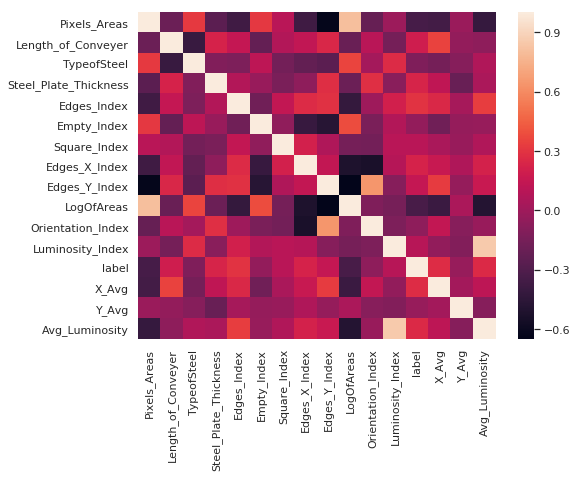

In [0]:
sns.set(rc={'figure.figsize':(8,6)})
corr = train_df.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"], axis=1).corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

Correlation between all the features are much reduced, which shows all these features are important.

# **Splitting the features and labels**

In [0]:
#separating features and labels of tarining, validation and test set

train_fea = train_df.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults","label"], axis=1)
train_label = train_df["label"]

valid_fea = valid_df.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults","label"], axis=1)
valid_label = valid_df["label"]

test_fea = test_df.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults","label"], axis=1)
test_label = test_df["label"]

train_fea.head()


,Pixels_Areas,Length_of_Conveyer,TypeofSteel,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Edges_X_Index,Edges_Y_Index,LogOfAreas,Orientation_Index,Luminosity_Index,X_Avg,Y_Avg,Avg_Luminosity
822,144,1354,1,40,0.0325,0.3739,0.1087,0.2500,0.9787,2.1584,0.8913,-0.0630,1329.5,1647931.0,121.0
1405,66,1687,0,80,0.7848,0.1750,0.8000,0.8000,1.0000,1.8195,0.2000,-0.1500,666.0,781439.0,106.0
1795,67,1362,0,120,0.2144,0.1625,0.8000,0.9091,1.0000,1.8261,-0.2000,-0.1646,1211.0,1802456.0,108.0
432,14969,1400,1,40,0.0614,0.4940,0.9884,0.2124,0.3439,4.1752,0.0116,-0.0821,128.5,1164388.5,84.5
1907,95,1362,1,40,0.1792,0.5602,0.3750,0.7273,0.4091,1.9777,-0.6250,0.0334,134.0,203256.5,133.5


# **Standardisation of Feature datasets**

In [0]:
dataset=[train_fea,train_label,valid_fea,valid_label,test_fea,test_label]
def stand(df):
  x = df.values #returns a numpy array
  col=df.columns
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  df[col]=x_scaled
  return df

for i in range(0,len(dataset),2):  # standardizing only features
  dataset[i]=stand(dataset[i])
  
train_fea.head()

,Pixels_Areas,Length_of_Conveyer,TypeofSteel,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Edges_X_Index,Edges_Y_Index,LogOfAreas,Orientation_Index,Luminosity_Index,X_Avg,Y_Avg,Avg_Luminosity
822,0.005575,0.260246,1.0,0.000000,0.032812,0.420680,0.100605,0.198290,0.977617,0.452462,0.967167,0.588394,0.785503,0.126968,0.552561
1405,0.002513,0.942623,0.0,0.153846,0.792327,0.196895,0.798184,0.786211,1.000000,0.369906,0.611962,0.533698,0.392899,0.059840,0.471698
1795,0.002552,0.276639,0.0,0.307692,0.216456,0.182831,0.798184,0.902833,1.000000,0.371513,0.406433,0.524519,0.715385,0.138939,0.482480
432,0.587609,0.354508,1.0,0.000000,0.061989,0.555806,0.988295,0.158097,0.310530,0.943753,0.515158,0.576386,0.074852,0.089508,0.355795
1907,0.003651,0.276639,1.0,0.000000,0.180919,0.630288,0.369324,0.708498,0.379046,0.408443,0.188059,0.649000,0.078107,0.015048,0.619946


Referring to the paper: https://pdfs.semanticscholar.org/21d3/cdbf444f42d3854cad0cea1afe45cfc6ce0f.pdf

# PCA (Principal Component Analysis)

Current shape of Training dataset is  (1164, 15)


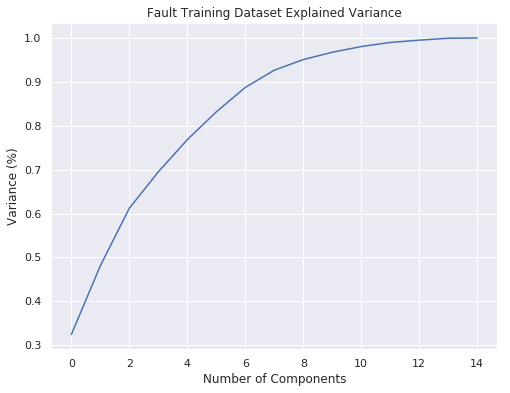

In [0]:
print("Current shape of Training dataset is ",train_fea.shape)
#Fitting the PCA algorithm with our Data
pca = PCA().fit(train_fea)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Fault Training Dataset Explained Variance')
plt.show()

This plot tells us that selecting 11 components we can preserve something around 98.8% or 99% of the total variance of the data. 
We should not use 100% of our variance, because it denotes all components, and we want only the principal ones.

In [0]:
pca = PCA(n_components=11)
train_pca = pca.fit_transform(train_fea)
print("Current shape of Training dataset is ",train_pca.shape)

Current shape of Training dataset is  (1164, 11)


# K-Means Clustering

In [0]:
def plot_cluster(dataset,label):
  c1,c2,c3,c4,c5,c6,c7=0,0,0,0,0,0,0
  for i in range(0, dataset.shape[0]):
    if label[i] == 0:
      c1 = plt.scatter(dataset[i,0],dataset[i,1],c='r', marker='+')
    elif label[i] == 1:
      c2 = plt.scatter(dataset[i,0],dataset[i,1],c='g', marker='o')
    elif label[i] == 2:
      c3 = plt.scatter(dataset[i,0],dataset[i,1],c='b', marker='*')
    elif label[i] == 3:
      c4 = plt.scatter(dataset[i,0],dataset[i,1],c='c', marker='s')
    elif label[i] == 4:
      c5 = plt.scatter(dataset[i,0],dataset[i,1],c='m', marker='D')
    elif label[i] == 5:
      c6 = plt.scatter(dataset[i,0],dataset[i,1],c='y', marker='v')
    elif label[i] == 6:
      c7 = plt.scatter(dataset[i,0],dataset[i,1],c='k', marker='^')
  return [c1, c2, c3,c4,c5,c6,c7][0:max(label)+1]

PCA applied dataset with their original labels (on left) and K Means clustering (7 clusters) applied on PCA applied dataset (on right)


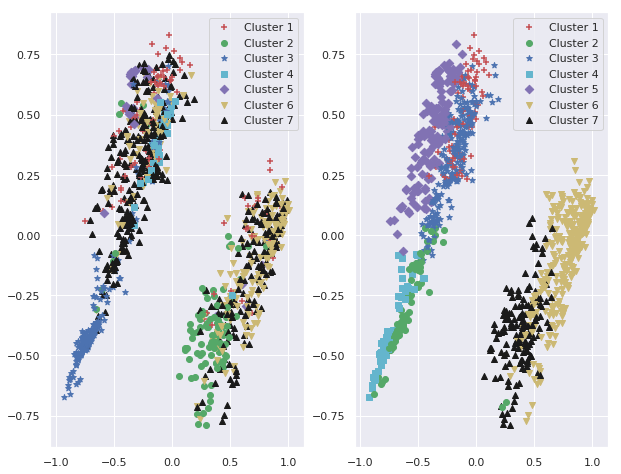

Dataset without PCA with their original labels (on left) and K Means clustering (7 clusters) applied on Dataset without PCA (on right)


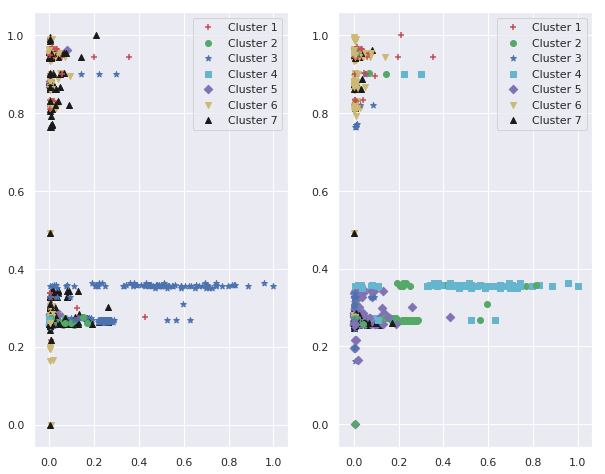

In [0]:
from sklearn.cluster import KMeans
sns.set(rc={'figure.figsize':(10,8)})

print("PCA applied dataset with their original labels (on left) and K Means clustering (7 clusters) applied on PCA applied dataset (on right)")

# PCA applied Dataset

#Original Labels
plt.subplot(1, 2, 1)
plt.legend(plot_cluster(train_pca,train_label.values), ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7'])

#KMeans Labels
km = KMeans(    n_clusters=7, init='random',    n_init=10, max_iter=300, tol=1e-04, random_state=0)
km_pca = km.fit_predict(train_pca)
centroids_pca = km.cluster_centers_
labels_pca = km.labels_

plt.subplot(1, 2, 2)
plt.legend(plot_cluster(train_pca,labels_pca), ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7'])
plt.show()




print("Dataset without PCA with their original labels (on left) and K Means clustering (7 clusters) applied on Dataset without PCA (on right)")

# Non PCA applied Dataset (All features)

#Original Labels
plt.subplot(1, 2, 1)
plt.legend(plot_cluster(np.array(train_fea),train_label.values), ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7'])

#KMeans Labels
km = KMeans(    n_clusters=7, init='random',    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0)
km_non_pca = km.fit_predict(train_fea)
centroids_non_pca = km.cluster_centers_
labels_non_pca = km.labels_

plt.subplot(1, 2, 2)
plt.legend(plot_cluster(np.array(train_fea),labels_non_pca), ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7'])
#plt.title('K Means clustering (7 clusters) applied on Dataset without PCA')
plt.show()

K Means clustering is an ***unsupervised machine learning algorithm***. As the model is unsupervised, it did not know which label (class 0 to 6) to assign to each class. Hence, we are going to change the class labels of the predicted values. We are not changing the any of the classification groups we are simply giving each group the correct number. We need to do this for measuring the performance.

In [0]:

def map_category(lab):
  modified_true_pca_label=[]
  for i in lab:
    if(i==0):
      modified_true_pca_label.append(2)
    elif(i==1):
      modified_true_pca_label.append(4)
    elif(i==2):
      modified_true_pca_label.append(5)
    elif(i==3):
      modified_true_pca_label.append(6)
    elif(i==4):
      modified_true_pca_label.append(1)
    elif(i==5):
      modified_true_pca_label.append(3)
    elif(i==6):
      modified_true_pca_label.append(0)
  return modified_true_pca_label


**The Elbow Method : tool to estimate the optimal number of clusters k**

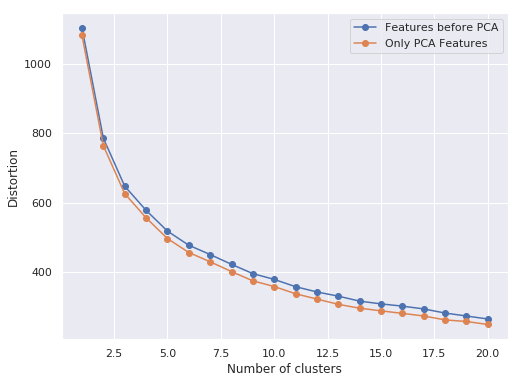

In [0]:
# calculate distortion for a range of number of cluster
distortion_pca,distortion_non_pca = [],[]
for i in range(1, 21):
    km_pca = KMeans(n_clusters=i, init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
    km_non_pca = KMeans(n_clusters=i, init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
    km_non_pca.fit(train_fea)
    km_pca.fit(train_pca)
    distortion_pca.append(km_pca.inertia_)
    distortion_non_pca.append(km_non_pca.inertia_)

sns.set(rc={'figure.figsize':(8,6)})
# plot
plt.plot(range(1, 21), distortion_non_pca, marker='o',label="Features before PCA")
plt.plot(range(1, 21), distortion_pca, marker='o',label="Only PCA Features")
plt.legend()
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


The Elbow Method helps in identifying the value of k where the distortion (within-cluster SSE) begins to decrease most rapidly. Both the graph suggests that **k should be around 3**.

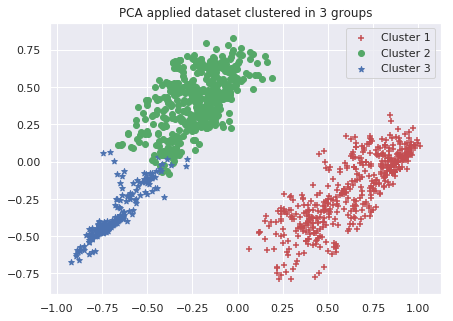

In [0]:
# Calculating K-Means considering cluster = 3
sns.set(rc={'figure.figsize':(7,5)})
km = KMeans(    n_clusters=3, init='random',    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0)
km_pca = km.fit_predict(train_pca)
centroids_pca = km.cluster_centers_
labels_pca = km.labels_

plt.legend(plot_cluster(train_pca,labels_pca), ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('PCA applied dataset clustered in 3 groups')
plt.show()

This shows that when we consider 3 clusters as suggested by the elbow method, the overlapping of cluster is much less and the clusters are quite distinctive compared to the earlier case where number of cluster was taken as 7.

However, for the calculation purpose, we are using the k=7 as we have that knowledge from the datasets domain.

**Score Calculation**

In [0]:
pca = PCA(n_components = 11)
pca.fit(train_fea)

print("PCA Calculation under progress for all 3 datasets...")
PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

train_pca = pca.transform(train_fea)
print("PCA applied successfully on Training set.")

valid_pca = pca.transform(valid_fea)
print("PCA applied successfully on Validation set.")


test_pca = pca.transform(test_fea)
print("PCA applied successfully on Testing set.")

actual_labels=[map_category(train_label.values),map_category(train_label.values),map_category(valid_label.values),map_category(valid_label.values),
              map_category(test_label.values),map_category(test_label.values)]
dataset=[train_pca,train_fea,valid_pca,valid_fea,test_pca,test_fea]
out=[" PCA applied Training "," Actual Training "," PCA applied Validation "," Actual Validation "," PCA applied Testing "," Actual Testing "]

i=0
for i in range(6):
  km = KMeans(    n_clusters=7, init='random',    n_init=10, max_iter=300, tol=1e-04, random_state=0)
  km.fit_predict(dataset[i])
  centroids = km.cluster_centers_
  predicted_labels = km.labels_
  print("Accuracy Scores of",out[i],"set : ",accuracy_score(actual_labels[i], predicted_labels))
  i=i+1

PCA Calculation under progress for all 3 datasets...
PCA applied successfully on Training set.
PCA applied successfully on Validation set.
PCA applied successfully on Testing set.
Accuracy Scores of  PCA applied Training  set :  0.0429553264604811
Accuracy Scores of  Actual Training  set :  0.0429553264604811
Accuracy Scores of  PCA applied Validation  set :  0.0979381443298969
Accuracy Scores of  Actual Validation  set :  0.0979381443298969
Accuracy Scores of  PCA applied Testing  set :  0.13367609254498714
Accuracy Scores of  Actual Testing  set :  0.13367609254498714


In [0]:
dataset_pca=[train_pca,valid_pca,test_pca]
dataset_non_pca=[train_fea,valid_fea,test_fea]

i,arr2=0,[]
for i in range(0,3):
  df=dataset_pca[i]
  arr1=[]
  for n_clusters in range(2,11):
      clusterer = KMeans( n_clusters=n_clusters, init='random',    n_init=10, max_iter=300, tol=1e-04, random_state=0)
      clusterer.fit(dataset_pca[0])
      preds = clusterer.predict(df)
      centers = clusterer.cluster_centers_

      score = silhouette_score (df, preds, metric='euclidean')
      arr1.append(score)
  i=i+1
  arr2.append(arr1)
score_pca=pd.DataFrame(arr2, columns = ["2","3","4","5","6","7","8","9","10"],index=["Train","Valid","Test"])
print("Silhouette Score for different n_cluster values trained on PCA applied features")
print(score_pca)

i,arr2=0,[]
for i in range(0,3):
  df=dataset_non_pca[i]
  arr1=[]
  for n_clusters in range(2,11):
      clusterer = KMeans( n_clusters=n_clusters, init='random',    n_init=10, max_iter=300, tol=1e-04, random_state=0)
      clusterer.fit(dataset_non_pca[0])
      preds = clusterer.predict(df)
      centers = clusterer.cluster_centers_

      score = silhouette_score (df, preds, metric='euclidean')
      arr1.append(score)
  i=i+1
  arr2.append(arr1)
score_non_pca=pd.DataFrame(arr2, columns = ["2","3","4","5","6","7","8","9","10"],index=["Train","Valid","Test"])
print("Silhouette Score for different n_cluster values trained on actual features")
print(score_non_pca)

Silhouette Score for different n_cluster values trained on PCA applied features
              2         3         4  ...         8         9        10
Train  0.290931  0.285409  0.276929  ...  0.275194  0.280928  0.272643
Valid  0.281358  0.266962  0.266844  ...  0.258900  0.276227  0.266050
Test   0.289398  0.277555  0.265584  ...  0.234293  0.231425  0.218048

[3 rows x 9 columns]
Silhouette Score for different n_cluster values trained on actual features
              2         3         4  ...         8         9        10
Train  0.284791  0.278603  0.269477  ...  0.264482  0.269605  0.262103
Valid  0.274474  0.266580  0.262703  ...  0.254713  0.269378  0.258208
Test   0.283196  0.272845  0.259855  ...  0.225895  0.222501  0.212644

[3 rows x 9 columns]


# SVM (Support Vector Machine)

**Tuning Parameters**
*   ***Kernel***: The learning of the hyperplane is done by transforming the problem using some algebra (Linear, Polynomial, Exponential)
*   ***Regularization Parameter***: It (often termed as C parameter in python’s sklearn library) informs the SVM optimization about how much we want to avoid misclassifying each training example.
*   ***Gamma***: If it is a high value, the points close to plausible separation line are considered in calculation. If low, far away points are also considered.
*   ***Margin***: It is a separation of line to the closest class points


In [0]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
import pandas as pd

clf = svm.SVC(gamma='auto')
clf.fit(train_fea, train_label)
confidence = clf.score(valid_fea, valid_label)
print("SVM Accuracy score for Validation set with basic model: ", confidence)

SVM Accuracy score for Validation set with basic model:  0.5902061855670103


**Tuning of C :**

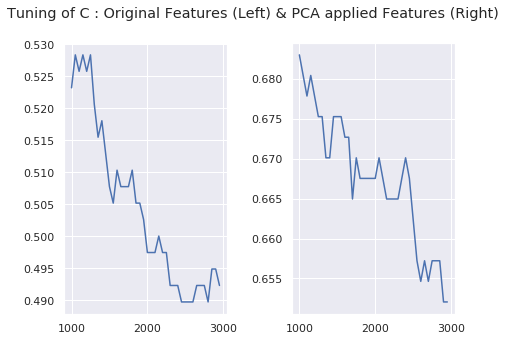

In [0]:
# original features
x,y=[],[]
max_x,max_y=0,0
for i in range(1000,3000,50):
  clf = svm.SVC(kernel="rbf", C = i,gamma='auto')
  clf.fit(train_fea, train_label)
  predicted_labels = clf.predict(valid_fea)
  x.append(i)
  y.append(accuracy_score(valid_label, predicted_labels))
  if(accuracy_score(valid_label, predicted_labels)>max_y):
    max_y=accuracy_score(valid_label, predicted_labels)
    max_x=i
    
# PCA applied features
x1,y1=[],[]
max_x1,max_y1=0,0
for i in range(1000,3000,50):
  clf = svm.SVC(kernel="rbf", C = i,gamma='auto')
  clf.fit(train_pca, train_label)
  predicted_labels = clf.predict(valid_pca)
  x1.append(i)
  y1.append(accuracy_score(valid_label, predicted_labels))
  if(accuracy_score(valid_label, predicted_labels)>max_y1):
    max_y1=accuracy_score(valid_label, predicted_labels)
    max_x1=i
#plt.plot(x,y)

fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.4)
fig.suptitle('Tuning of C : Original Features (Left) & PCA applied Features (Right)')
ax1.plot(x, y)
ax2.plot(x1,y1)

In [0]:
print("We will choose C = ",max_x," for original features because for larger values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.")
print("We will choose C = ",max_x1," for PCA applied features because for larger values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.")

We will choose C =  1050  for original features because for larger values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.
We will choose C =  1000  for PCA applied features because for larger values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.


**Tuning of gamma :**

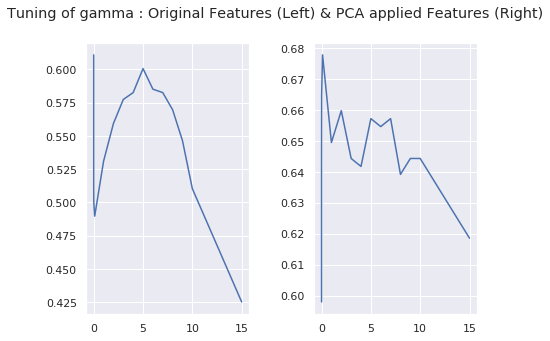

In [0]:
x,y=[0.0001,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,15],[]
m1,m2=0,0
for i in x:
  clf = svm.SVC(kernel="rbf", C = max_x,gamma=i)
  clf.fit(train_fea, train_label)
  predicted_labels = clf.predict(valid_fea)
  y.append(accuracy_score(valid_label, predicted_labels))
  if(accuracy_score(valid_label, predicted_labels)>m2):
    m2=accuracy_score(valid_label, predicted_labels)
    m1=i
#plt.plot(x,y)

x1,y1=[0.0001,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,15],[]
m_1,m_2=0,0
for i in x1:
  clf = svm.SVC(kernel="rbf", C = max_x1,gamma=i)
  clf.fit(train_pca, train_label)
  predicted_labels = clf.predict(valid_pca)
  y1.append(accuracy_score(valid_label, predicted_labels))
  if(accuracy_score(valid_label, predicted_labels)>m_2):
    m_2=accuracy_score(valid_label, predicted_labels)
    m_1=i
#plt.plot(x1,y1)

fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.4)
fig.suptitle('Tuning of gamma : Original Features (Left) & PCA applied Features (Right)')
ax1.plot(x, y)
ax2.plot(x1,y1)

In [0]:
print("We will choose gamma = ",m1," for original features as the score is highest against it.")
print("We will choose gamma = ",m_1," for PCA applied features as the score is highest against it.")

We will choose gamma =  0.0001  for original features as the score is highest against it.
We will choose gamma =  0.1  for PCA applied features as the score is highest against it.


In [0]:
def show_fscore(valid_label, predicted_labels):
  pr, rec, fs, unique_labels = precision_recall_fscore_support(valid_label, predicted_labels)
  print("The FScore of the 7 labels are as follows:")
  for i in range(0,7):
    print("Class ",i," : ",fs[i])
  print("Average FScore : ",sum(fs)/len(fs))

In [0]:
print("-------------------------------------------")
clf_fea = svm.SVC(kernel="rbf", C = max_x,gamma=m1)
clf_fea.fit(train_fea, train_label)
predicted_labels = clf_fea.predict(valid_fea)
print("Validation Results from original features dataset:")
print("-------------------------------------------")
svm_valid_non_pca_acc = accuracy_score(valid_label, predicted_labels)
print("Accuracy Score : ",accuracy_score(valid_label, predicted_labels))
show_fscore(valid_label,predicted_labels)

print("-------------------------------------------")
clf_pca = svm.SVC(kernel="rbf", C = max_x1,gamma=m_1)
clf_pca.fit(train_pca, train_label)
predicted_labels = clf_pca.predict(valid_pca)
print("Validation Results from PCA applied features dataset:")
print("-------------------------------------------")
svm_valid_pca_acc = accuracy_score(valid_label, predicted_labels)
print("Accuracy Score : ",accuracy_score(valid_label, predicted_labels))
show_fscore(valid_label,predicted_labels)

-------------------------------------------
Validation Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6108247422680413
The FScore of the 7 labels are as follows:
Class  0  :  0.12121212121212122
Class  1  :  0.7826086956521738
Class  2  :  0.8758169934640523
Class  3  :  0.5454545454545454
Class  4  :  0.0
Class  5  :  0.4931506849315069
Class  6  :  0.5660377358490567
Average FScore :  0.4834686823662081
-------------------------------------------
Validation Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6778350515463918
The FScore of the 7 labels are as follows:
Class  0  :  0.40540540540540543
Class  1  :  0.8842105263157896
Class  2  :  0.9240506329113923
Class  3  :  0.5423728813559322
Class  4  :  0.8
Class  5  :  0.5972222222222222
Class  6  :  0.5791855203619909
Average FScore :  0.6760638840818188


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print("-------------------------------------------")
predicted_labels = clf_fea.predict(test_fea)
print("Testing Results from original features dataset:")
print("-------------------------------------------")
svm_test_non_pca_acc = accuracy_score(test_label, predicted_labels)
print("Accuracy Score : ",accuracy_score(test_label, predicted_labels))
show_fscore(test_label,predicted_labels)

print("-------------------------------------------")
predicted_labels = clf_pca.predict(test_pca)
print("Testing Results from PCA applied features dataset:")
print("-------------------------------------------")
svm_test_pca_acc = accuracy_score(test_label, predicted_labels)
print("Accuracy Score : ",accuracy_score(test_label, predicted_labels))
show_fscore(test_label,predicted_labels)

-------------------------------------------
Testing Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6272493573264781
The FScore of the 7 labels are as follows:
Class  0  :  0.15384615384615385
Class  1  :  0.7956989247311828
Class  2  :  0.8852459016393442
Class  3  :  0.5
Class  4  :  0.0
Class  5  :  0.5810055865921787
Class  6  :  0.5961538461538461
Average FScore :  0.5017072018518152
-------------------------------------------
Testing Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.7172236503856041
The FScore of the 7 labels are as follows:
Class  0  :  0.6511627906976744
Class  1  :  0.8351648351648352
Class  2  :  0.9147286821705426
Class  3  :  0.8749999999999999
Class  4  :  0.4444444444444444
Class  5  :  0.6588235294117646
Class  6  :  0.6349206349206349
Average FScore :  0.7163207024014137


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# KNN Algorithm

This algorithm computes the distance between the new data with every training samples.
For computing the distance, Euclidean distance, Hamming distance or Manhattan distance are usually used.
Algo picks K entries in the database which are closest to the new data point.
Then it does the majority vote i.e the most common class/label among those K entries will be the class of the new data point.

**Optimizing value of K for KNN Algorithm**

Text(0, 0.5, 'Accuracy Score')

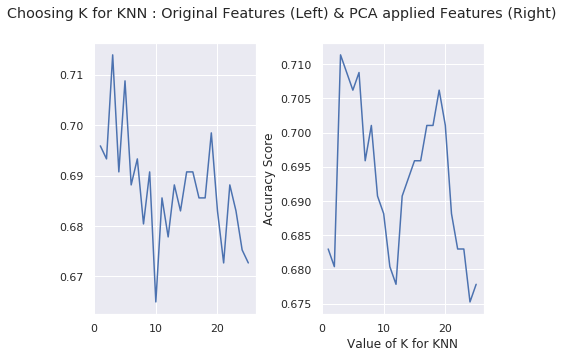

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# original features
scores,scores_list,max_score_fea,max_k_fea={},[],0,0
for k in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_fea,train_label)
  predicted_label=knn.predict(valid_fea)
  scores[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores[k]>max_score_fea and k!=1):
    max_score_fea=scores[k]
    max_k_fea=k
  scores_list.append(scores[k])
  
# PCA applied features
scores_pca,scores_list_pca,max_score_pca,max_k_pca={},[],0,0
for k in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_pca,train_label)
  predicted_label=knn.predict(valid_pca)
  scores_pca[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores_pca[k]>max_score_pca and k!=1):
    max_score_pca=scores_pca[k]
    max_k_pca=k
  scores_list_pca.append(scores_pca[k])

  
fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.4)
fig.suptitle('Choosing K for KNN : Original Features (Left) & PCA applied Features (Right)')
ax1.plot(range(1,26), scores_list)
ax2.plot(range(1,26),scores_list_pca)
plt.xlabel("Value of K for KNN")
plt.ylabel("Accuracy Score")

In [0]:
print("We will choose K = ",max_k_fea," for original features as the score is highest against it.")
print("We will choose K = ",max_k_pca," for PCA applied features as the score is highest against it.")

We will choose K =  3  for original features as the score is highest against it.
We will choose K =  3  for PCA applied features as the score is highest against it.


The prediction is always accurate with K=1. At K=1, we are overfitting the boundaries. Hence, error rate initially decreases and reaches a minima. After the minima point, it then increase with increasing K. The validation error curve is plotted to get the optimal value of K. This value of K will be used for all predictions.

In [0]:
print("-------------------------------------------")
knn_fea = KNeighborsClassifier(n_neighbors = 4)
knn_fea.fit(train_fea,train_label)
predicted_valid_label=knn_fea.predict(valid_fea)
print("Validation Results from original features dataset:")
print("-------------------------------------------")
knn_valid_non_pca_acc = accuracy_score(valid_label, predicted_valid_label)
print("Accuracy Score : ",metrics.accuracy_score(valid_label,predicted_valid_label))
show_fscore(valid_label,predicted_valid_label)

print("-------------------------------------------")
knn_pca = KNeighborsClassifier(n_neighbors = 4)
knn_pca.fit(train_pca, train_label)
predicted_valid_labels = knn_pca.predict(valid_pca)
print("Validation Results from PCA applied features dataset:")
print("-------------------------------------------")
knn_valid_pca_acc = accuracy_score(valid_label, predicted_valid_label)
print("Accuracy Score : ",metrics.accuracy_score(valid_label, predicted_valid_labels))
show_fscore(valid_label,predicted_valid_labels)

-------------------------------------------
Validation Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6907216494845361
The FScore of the 7 labels are as follows:
Class  0  :  0.4074074074074074
Class  1  :  0.7956989247311828
Class  2  :  0.9523809523809523
Class  3  :  0.7142857142857143
Class  4  :  0.6956521739130435
Class  5  :  0.5384615384615384
Class  6  :  0.625
Average FScore :  0.6755552444542626
-------------------------------------------
Validation Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.7087628865979382
The FScore of the 7 labels are as follows:
Class  0  :  0.43636363636363634
Class  1  :  0.7872340425531915
Class  2  :  0.9700598802395209
Class  3  :  0.8421052631578948
Class  4  :  0.6956521739130435
Class  5  :  0.5818181818181819
Class  6  :  0.6239316239316239
Average FScore :  0.7053092574252988


In [0]:
print("-------------------------------------------")
knn_fea = KNeighborsClassifier(n_neighbors = 4)
knn_fea.fit(train_fea,train_label)
predicted_test_label=knn_fea.predict(test_fea)
print("Testing Results from original features dataset:")
print("-------------------------------------------")
knn_test_non_pca_acc = metrics.accuracy_score(test_label,predicted_test_label)
print("Accuracy Score : ",metrics.accuracy_score(test_label,predicted_test_label))
show_fscore(test_label,predicted_test_label)

print("-------------------------------------------")
knn_pca = KNeighborsClassifier(n_neighbors = 4)
knn_pca.fit(train_pca, train_label)
predicted_test_labels = knn_pca.predict(test_pca)
print("Testing Results from PCA applied features dataset:")
print("-------------------------------------------")
knn_test_pca_acc = metrics.accuracy_score(test_label,predicted_test_label)
print("Accuracy Score : ",metrics.accuracy_score(test_label, predicted_test_labels))
show_fscore(test_label,predicted_test_labels)

-------------------------------------------
Testing Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6580976863753213
The FScore of the 7 labels are as follows:
Class  0  :  0.4411764705882353
Class  1  :  0.7835051546391752
Class  2  :  0.9076923076923077
Class  3  :  0.8666666666666667
Class  4  :  0.5599999999999999
Class  5  :  0.5714285714285715
Class  6  :  0.5853658536585364
Average FScore :  0.6736907178104989
-------------------------------------------
Testing Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6580976863753213
The FScore of the 7 labels are as follows:
Class  0  :  0.5142857142857143
Class  1  :  0.8
Class  2  :  0.887218045112782
Class  3  :  0.8666666666666667
Class  4  :  0.64
Class  5  :  0.5638297872340425
Class  6  :  0.5654008438818565
Average FScore :  0.691057293883009


# Decision Tree

Decision Tree Classifier, repetitively divides the working area(plot) into sub part by identifying lines. (repetitively because there may be two distant regions of same class divided by other).


*   **Impurities** : Impurity is when we have a traces of one class division into other. We tolerate some percentage of impurity (we stop further division) for faster performance. (There is always trade off between accuracy and performance).
*   **Entropy** : Entropy is degree of randomness of elements or in other words it is measure of impurity. [-sum(p(x)log p(x))]


*   **Information Gain** : If we have many features, on which feature's basis should we divide the plot is decided by the Information Gain



**Tuning min_samples_split for Decision Tree**

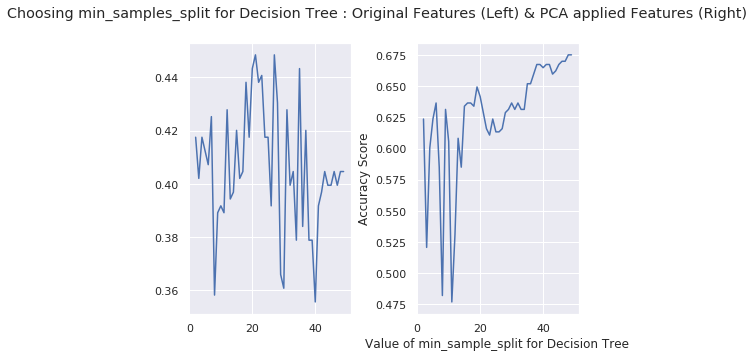

In [0]:
from sklearn import tree

# original features
scores,scores_list,max_score_fea,max_k_fea={},[],0,0
for k in range(2,50):
  model = tree.DecisionTreeClassifier(min_samples_split=k,criterion="entropy")
  model.fit(train_fea,train_label)
  predicted_label=model.predict(valid_fea)
  scores[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores[k]>max_score_fea and k!=1):
    max_score_fea=scores[k]
    max_k_fea=k
  scores_list.append(scores[k])
  
# PCA applied features
scores_pca,scores_list_pca,max_score_pca,max_k_pca={},[],0,0
for k in range(2,50):
  model = tree.DecisionTreeClassifier(min_samples_split=k,criterion="entropy")
  model.fit(train_pca,train_label)
  predicted_label=model.predict(valid_pca)
  scores_pca[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores_pca[k]>max_score_pca and k!=1):
    max_score_pca=scores_pca[k]
    max_k_pca=k
  scores_list_pca.append(scores_pca[k])

  
fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.4)
fig.suptitle('Choosing min_samples_split for Decision Tree : Original Features (Left) & PCA applied Features (Right)')
ax1.plot(range(2,50), scores_list)
ax2.plot(range(2,50),scores_list_pca)
plt.xlabel("Value of min_sample_split for Decision Tree")
plt.ylabel("Accuracy Score")

dt_split_fea,dt_split_pca=max_k_fea,max_k_pca

'entropy' gives better result that 'gini', hence going with 'entropy'.

In [0]:
print("We will choose min_samples_split = ",max_k_fea," for original features as the score is highest against it.")
print("We will choose min_samples_split = ",max_k_pca," for PCA applied features as the score is highest against it.")

We will choose min_samples_split =  21  for original features as the score is highest against it.
We will choose min_samples_split =  48  for PCA applied features as the score is highest against it.


In [0]:
print("-------------------------------------------")
model = tree.DecisionTreeClassifier(min_samples_split = max_k_fea
                                    ,criterion="entropy")
model.fit(train_fea,train_label)
predicted_valid_label=model.predict(valid_fea)
print("Validation Results from original features dataset:")
print("-------------------------------------------")
dt_valid_non_pca_acc = metrics.accuracy_score(valid_label,predicted_valid_label)
print("Accuracy Score : ",metrics.accuracy_score(valid_label,predicted_valid_label))
show_fscore(valid_label,predicted_valid_label)

print("-------------------------------------------")
model = tree.DecisionTreeClassifier(min_samples_split = max_k_pca
                                    ,criterion="entropy")
model.fit(train_pca, train_label)
predicted_valid_labels = model.predict(valid_pca)
print("Validation Results from PCA applied features dataset:")
print("-------------------------------------------")
dt_valid_pca_acc = metrics.accuracy_score(valid_label,predicted_valid_label)
print("Accuracy Score : ",metrics.accuracy_score(valid_label, predicted_valid_labels))
show_fscore(valid_label,predicted_valid_labels)

-------------------------------------------
Validation Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.41237113402061853
The FScore of the 7 labels are as follows:
Class  0  :  0.39215686274509803
Class  1  :  0.8222222222222223
Class  2  :  0.05660377358490566
Class  3  :  0.39506172839506176
Class  4  :  0.4
Class  5  :  0.43421052631578944
Class  6  :  0.4128113879003559
Average FScore :  0.41615235730906186
-------------------------------------------
Validation Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6752577319587629
The FScore of the 7 labels are as follows:
Class  0  :  0.4838709677419355
Class  1  :  0.7640449438202247
Class  2  :  0.9333333333333333
Class  3  :  0.7027027027027026
Class  4  :  0.6
Class  5  :  0.5100671140939597
Class  6  :  0.6229508196721312
Average FScore :  0.6595671259091839


In [0]:
print("-------------------------------------------")
model = tree.DecisionTreeClassifier(min_samples_split = max_k_fea,
                                    criterion="entropy")
model.fit(train_fea,train_label)
predicted_test_label=model.predict(test_fea)
print("Testing Results from original features dataset:")
print("-------------------------------------------")
dt_test_non_pca_acc = metrics.accuracy_score(test_label,predicted_test_label)
print("Accuracy Score : ",metrics.accuracy_score(test_label,predicted_test_label))
show_fscore(test_label,predicted_test_label)

print("-------------------------------------------")
model = tree.DecisionTreeClassifier(min_samples_split = max_k_pca,
                                    criterion="entropy")
model.fit(train_pca, train_label)
predicted_test_labels = model.predict(test_pca)
print("Testing Results from PCA applied features dataset:")
print("-------------------------------------------")
dt_test_pca_acc = metrics.accuracy_score(test_label,predicted_test_label)
print("Accuracy Score : ",metrics.accuracy_score(test_label, predicted_test_labels))
show_fscore(test_label,predicted_test_labels)

-------------------------------------------
Testing Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.5501285347043702
The FScore of the 7 labels are as follows:
Class  0  :  0.40540540540540543
Class  1  :  0.8478260869565216
Class  2  :  0.6336633663366337
Class  3  :  0.9333333333333333
Class  4  :  0.0
Class  5  :  0.4545454545454545
Class  6  :  0.5103448275862069
Average FScore :  0.5407312105947936
-------------------------------------------
Testing Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.5809768637532133
The FScore of the 7 labels are as follows:
Class  0  :  0.40579710144927533
Class  1  :  0.7499999999999999
Class  2  :  0.828125
Class  3  :  0.6666666666666666
Class  4  :  0.24242424242424246
Class  5  :  0.5276073619631902
Class  6  :  0.5168539325842697
Average FScore :  0.5624963292982349


# Random Forest

Random Forest is an ensemble algorithm. Ensembled algorithms are those which combines more than one algorithms of same or different kind for classifying objects. Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

*   **n_estimators** : Number of trees in forest. Default is 10.
*   **criterion**: “gini” or “entropy” same as decision tree classifier.
*   **min_samples_split**: minimum number of working set size at node required to split. Default is 2.



**Tuning of n_estimators**

Text(0, 0.5, 'Accuracy Score')

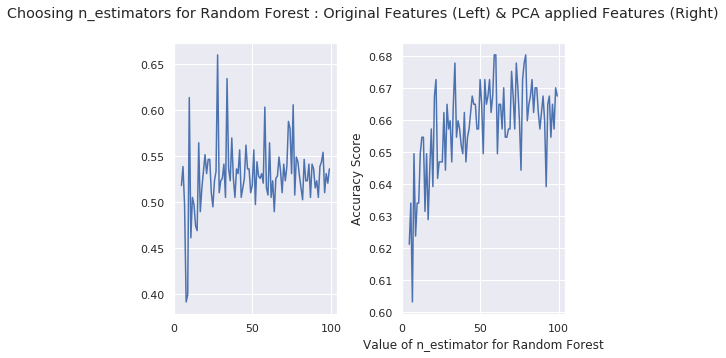

In [0]:
# Import the model we are using
#from sklearn.ensemble import RandomForestRegressor

# original features
scores,scores_list,max_score_fea,max_k_fea={},[],0,0
for k in range(5,100):
  model = RandomForestClassifier(n_estimators=k,min_samples_split=dt_split_fea,
                                 criterion="entropy")
  model.fit(train_fea,train_label)
  predicted_label=model.predict(valid_fea)
  scores[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores[k]>max_score_fea and k!=1):
    max_score_fea=scores[k]
    max_k_fea=k
  scores_list.append(scores[k])
  
# PCA applied features
scores_pca,scores_list_pca,max_score_pca,max_k_pca={},[],0,0
for k in range(5,100):
  model = RandomForestClassifier(n_estimators=k,min_samples_split=dt_split_pca,
                                 criterion="entropy")
  model.fit(train_pca,train_label)
  predicted_label=model.predict(valid_pca)
  scores_pca[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores_pca[k]>max_score_pca and k!=1):
    max_score_pca=scores_pca[k]
    max_k_pca=k
  scores_list_pca.append(scores_pca[k])

  
fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.4)
fig.suptitle('Choosing n_estimators for Random Forest : Original Features (Left) & PCA applied Features (Right)')
ax1.plot(range(5,100), scores_list)
ax2.plot(range(5,100),scores_list_pca)
plt.xlabel("Value of n_estimator for Random Forest")
plt.ylabel("Accuracy Score")

'entropy' gives better result that 'gini', hence going with 'entropy'.

In [0]:
print("We will choose n_estimators = ",max_k_fea," for original features as the score is highest against it.")
print("We will choose n_estimators = ",max_k_pca," for PCA applied features as the score is highest against it.")

We will choose n_estimators =  28  for original features as the score is highest against it.
We will choose n_estimators =  59  for PCA applied features as the score is highest against it.


In [0]:
print("-------------------------------------------")
model = RandomForestClassifier(n_estimators=max_k_fea,min_samples_split=dt_split_fea,
                                 criterion="entropy")
model.fit(train_fea,train_label)
predicted_valid_label=model.predict(valid_fea)
print("Validation Results from original features dataset:")
print("-------------------------------------------")
rf_valid_non_pca_acc = metrics.accuracy_score(valid_label,predicted_valid_label)
print("Accuracy Score : ",metrics.accuracy_score(valid_label,predicted_valid_label))
show_fscore(valid_label,predicted_valid_label)

print("-------------------------------------------")
model = RandomForestClassifier(n_estimators=max_k_pca,min_samples_split=dt_split_pca,
                                 criterion="entropy")
model.fit(train_pca, train_label)
predicted_valid_labels = model.predict(valid_pca)
print("Validation Results from PCA applied features dataset:")
print("-------------------------------------------")
rf_valid_pca_acc = metrics.accuracy_score(valid_label,predicted_valid_label)
print("Accuracy Score : ",metrics.accuracy_score(valid_label, predicted_valid_labels))
show_fscore(valid_label,predicted_valid_labels)

-------------------------------------------
Validation Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.5154639175257731
The FScore of the 7 labels are as follows:
Class  0  :  0.2857142857142857
Class  1  :  0.8089887640449439
Class  2  :  0.3
Class  3  :  0.41025641025641024
Class  4  :  0.5882352941176471
Class  5  :  0.5
Class  6  :  0.5507246376811594
Average FScore :  0.491988484544921
-------------------------------------------
Validation Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6701030927835051
The FScore of the 7 labels are as follows:
Class  0  :  0.2777777777777778
Class  1  :  0.7865168539325843
Class  2  :  0.9044585987261147
Class  3  :  0.6666666666666666
Class  4  :  0.15384615384615385
Class  5  :  0.548148148148148
Class  6  :  0.6394984326018808
Average FScore :  0.5681303759570465


In [0]:
print("-------------------------------------------")
model = RandomForestClassifier(n_estimators=max_k_fea,min_samples_split=dt_split_fea,
                                 criterion="entropy")
model.fit(train_fea,train_label)
predicted_test_label=model.predict(test_fea)
print("Testing Results from original features dataset:")
print("-------------------------------------------")
rf_test_non_pca_acc = metrics.accuracy_score(test_label,predicted_test_label)
print("Accuracy Score : ",metrics.accuracy_score(test_label,predicted_test_label))
show_fscore(test_label,predicted_test_label)

print("-------------------------------------------")
model = RandomForestClassifier(n_estimators=max_k_pca,min_samples_split=dt_split_pca,
                                 criterion="entropy")
model.fit(train_pca, train_label)
predicted_test_labels = model.predict(test_pca)
print("Testing Results from PCA applied features dataset:")
print("-------------------------------------------")
rf_test_pca_acc = metrics.accuracy_score(test_label,predicted_test_label)
print("Accuracy Score : ",metrics.accuracy_score(test_label, predicted_test_labels))
show_fscore(test_label,predicted_test_labels)

-------------------------------------------
Testing Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6838046272493573
The FScore of the 7 labels are as follows:
Class  0  :  0.4642857142857143
Class  1  :  0.8409090909090908
Class  2  :  0.8852459016393442
Class  3  :  0.9655172413793104
Class  4  :  0.375
Class  5  :  0.49253731343283585
Class  6  :  0.6726726726726726
Average FScore :  0.6708811334741384
-------------------------------------------
Testing Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6478149100257069
The FScore of the 7 labels are as follows:
Class  0  :  0.30000000000000004
Class  1  :  0.8131868131868132
Class  2  :  0.8852459016393442
Class  3  :  0.4
Class  4  :  0.375
Class  5  :  0.5477707006369427
Class  6  :  0.6325301204819277
Average FScore :  0.5648190765635753


# Linear Discriminant Analysis (LDA)

If we have more than two classes then ***Linear Discriminant Analysis*** is the preferred linear classification technique. It considers statistical properties of our data, calculated for each class. For multiple variables, properties get calculated over the multivariate Gaussian, namely the means and the covariance matrix.
*   **n_components** : Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction. If None, will be set to min(n_classes - 1, n_features).
*   **shrinkage** : optional
Shrinkage parameter, possible values:
None- no shrinkage (default).
‘auto’- automatic shrinkage using the Ledoit-Wolf lemma.
float between 0 and 1 - fixed shrinkage parameter.

**Shrinkage** is a tool used to improve estimation of covariance matrices in situations where the number of training samples is small compared to the number of features. Currently shrinkage only works when setting the solver parameter to ‘lsqr’ or ‘eigen’.

LDA makes some **simplifying assumptions** about your data:

* Our data is Gaussian and that each variable is is shaped like a bell curve when plotted.
* Each attribute has the same variance and that values of each variable vary around the mean by the same amount on average.

**Tuning the shrinkage parameter:**

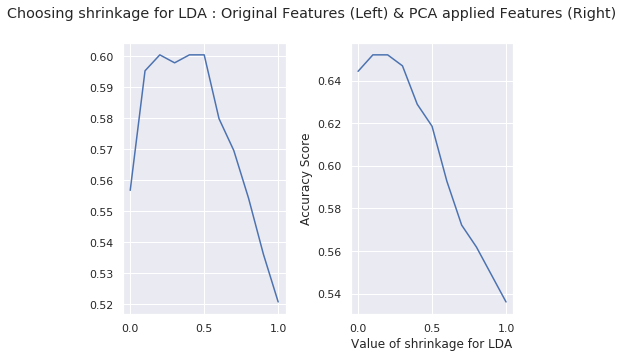

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# original features
scores,scores_list,max_score_fea,max_k_fea={},[],0,0
for k in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  model = LinearDiscriminantAnalysis(solver='eigen',shrinkage=k)
  model.fit(train_fea,train_label)
  predicted_label=model.predict(valid_fea)
  scores[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores[k]>max_score_fea and k!=1):
    max_score_fea=scores[k]
    max_k_fea=k
  scores_list.append(scores[k])
  
# PCA applied features
scores_pca,scores_list_pca,max_score_pca,max_k_pca={},[],0,0
for k in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  model = LinearDiscriminantAnalysis(solver='eigen',shrinkage=k)
  model.fit(train_pca,train_label)
  predicted_label=model.predict(valid_pca)
  scores_pca[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores_pca[k]>max_score_pca and k!=1):
    max_score_pca=scores_pca[k]
    max_k_pca=k
  scores_list_pca.append(scores_pca[k])

#LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
#              solver='svd', store_covariance=False, tol=0.0001)

fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.4)
fig.suptitle('Choosing shrinkage for LDA : Original Features (Left) & PCA applied Features (Right)')
ax1.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], scores_list)
ax2.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],scores_list_pca)
plt.xlabel("Value of shrinkage for LDA")
plt.ylabel("Accuracy Score")

lda_ncomp_fea,lda_ncomp_pca=max_k_fea,max_k_pca

In [0]:
print("We will choose shrinkage = ",max_k_fea," for original features as the score is highest against it.")
print("We will choose shrinkage = ",max_k_pca," for PCA applied features as the score is highest against it.")

We will choose shrinkage =  0.2  for original features as the score is highest against it.
We will choose shrinkage =  0.1  for PCA applied features as the score is highest against it.


**Tuning the n_components parameter:**

0


Text(0, 0.5, 'Accuracy Score')

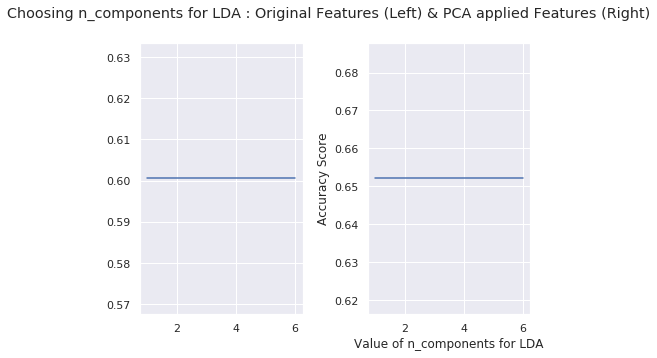

In [0]:
# original features
scores,scores_list,max_score_fea,max_k_fea={},[],0,0

# Number of components (<= min(n_classes - 1, n_features)) -> 1 to (min(6,PCA:11/Non_PCA:12))
print(max_k_fea)
for k in range(1,7):
  model = LinearDiscriminantAnalysis(n_components=k,solver='eigen',shrinkage=lda_ncomp_fea)
  model.fit(train_fea,train_label)
  predicted_label=model.predict(valid_fea)
  scores[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores[k]>max_score_fea and k!=1):
    max_score_fea=scores[k]
    max_k_fea=k
  scores_list.append(scores[k])
  
# PCA applied features
scores_pca,scores_list_pca,max_score_pca,max_k_pca={},[],0,0
for k in range(1,7):
  model = LinearDiscriminantAnalysis(n_components=k,solver='eigen',shrinkage=lda_ncomp_pca)
  model.fit(train_pca,train_label)
  predicted_label=model.predict(valid_pca)
  scores_pca[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores_pca[k]>max_score_pca and k!=1):
    max_score_pca=scores_pca[k]
    max_k_pca=k
  scores_list_pca.append(scores_pca[k])

fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.4)
fig.suptitle('Choosing n_components for LDA : Original Features (Left) & PCA applied Features (Right)')
ax1.plot(range(1,7), scores_list)
ax2.plot(range(1,7),scores_list_pca)
plt.xlabel("Value of n_components for LDA")
plt.ylabel("Accuracy Score")

In [0]:
print("We will choose n_components = ",max_k_fea," for original features as the score is highest against it.")
print("We will choose n_components = ",max_k_pca," for PCA applied features as the score is highest against it.")

We will choose n_components =  2  for original features as the score is highest against it.
We will choose n_components =  2  for PCA applied features as the score is highest against it.


In [0]:
print("-------------------------------------------")
model = LinearDiscriminantAnalysis(n_components=max_k_fea,solver='eigen',shrinkage=lda_ncomp_fea)
model.fit(train_fea,train_label)
predicted_valid_label=model.predict(valid_fea)
print("Validation Results from original features dataset:")
print("-------------------------------------------")
lda_valid_non_pca_acc = metrics.accuracy_score(valid_label,predicted_valid_label)
print("Accuracy Score : ",metrics.accuracy_score(valid_label,predicted_valid_label))
show_fscore(valid_label,predicted_valid_label)

print("-------------------------------------------")
model = LinearDiscriminantAnalysis(n_components=max_k_pca,solver='eigen',shrinkage=lda_ncomp_pca)
model.fit(train_pca, train_label)
predicted_valid_labels = model.predict(valid_pca)
print("Validation Results from PCA applied features dataset:")
print("-------------------------------------------")
lda_valid_pca_acc = metrics.accuracy_score(valid_label,predicted_valid_label)
print("Accuracy Score : ",metrics.accuracy_score(valid_label, predicted_valid_labels))
show_fscore(valid_label,predicted_valid_labels)

-------------------------------------------
Validation Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6005154639175257
The FScore of the 7 labels are as follows:
Class  0  :  0.47457627118644063
Class  1  :  0.6990291262135923
Class  2  :  0.8903225806451613
Class  3  :  0.5161290322580645
Class  4  :  0.48648648648648657
Class  5  :  0.4732824427480916
Class  6  :  0.5065502183406113
Average FScore :  0.5780537368397783
-------------------------------------------
Validation Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6520618556701031
The FScore of the 7 labels are as follows:
Class  0  :  0.4444444444444445
Class  1  :  0.74
Class  2  :  0.9056603773584906
Class  3  :  0.6666666666666666
Class  4  :  0.4848484848484849
Class  5  :  0.5323741007194244
Class  6  :  0.5843621399176955
Average FScore :  0.6226223162793152


In [0]:
print("-------------------------------------------")
model = LinearDiscriminantAnalysis(n_components=max_k_fea,solver='eigen',shrinkage=lda_ncomp_fea)
model.fit(train_fea,train_label)
predicted_test_label=model.predict(test_fea)
print("Testing Results from original features dataset:")
print("-------------------------------------------")
lda_test_non_pca_acc = metrics.accuracy_score(test_label,predicted_test_label)
print("Accuracy Score : ",metrics.accuracy_score(test_label,predicted_test_label))
show_fscore(test_label,predicted_test_label)

print("-------------------------------------------")
model = LinearDiscriminantAnalysis(n_components=max_k_pca,solver='eigen',shrinkage=lda_ncomp_pca)
model.fit(train_pca, train_label)
predicted_test_labels = model.predict(test_pca)
print("Testing Results from PCA applied features dataset:")
print("-------------------------------------------")
lda_test_pca_acc = metrics.accuracy_score(test_label,predicted_test_label)
print("Accuracy Score : ",metrics.accuracy_score(test_label, predicted_test_labels))
show_fscore(test_label,predicted_test_labels)

-------------------------------------------
Testing Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6118251928020566
The FScore of the 7 labels are as follows:
Class  0  :  0.4594594594594595
Class  1  :  0.7238095238095238
Class  2  :  0.8709677419354839
Class  3  :  0.8235294117647058
Class  4  :  0.38461538461538464
Class  5  :  0.5517241379310345
Class  6  :  0.5145228215767634
Average FScore :  0.618375497298908
-------------------------------------------
Testing Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6195372750642674
The FScore of the 7 labels are as follows:
Class  0  :  0.4799999999999999
Class  1  :  0.7450980392156863
Class  2  :  0.8661417322834646
Class  3  :  0.7741935483870969
Class  4  :  0.3636363636363637
Class  5  :  0.5635359116022101
Class  6  :  0.525
Average FScore :  0.6168007993035459


# Gaussian Naive Bayes Classifier

Naive Bayes is the most straightforward and fast classification algorithm which uses Bayes theorem of probability for prediction of unknown class. Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features.

In [0]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB


print("-------------------------------------------")
model = GaussianNB()
model.fit(train_fea,train_label)
predicted_valid_label=model.predict(valid_fea)
print("Validation Results from original features dataset:")
print("-------------------------------------------")
gb_valid_non_pca_acc = metrics.accuracy_score(valid_label,predicted_valid_label)
print("Accuracy Score : ",metrics.accuracy_score(valid_label,predicted_valid_label))
show_fscore(valid_label,predicted_valid_label)

print("-------------------------------------------")
model = GaussianNB()
model.fit(train_pca, train_label)
predicted_valid_labels = model.predict(valid_pca)
print("Validation Results from PCA applied features dataset:")
print("-------------------------------------------")
gb_valid_pca_acc = metrics.accuracy_score(valid_label,predicted_valid_label)
print("Accuracy Score : ",metrics.accuracy_score(valid_label, predicted_valid_labels))
show_fscore(valid_label,predicted_valid_labels)

-------------------------------------------
Validation Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6005154639175257
The FScore of the 7 labels are as follows:
Class  0  :  0.4634146341463415
Class  1  :  0.7901234567901235
Class  2  :  0.8765432098765432
Class  3  :  0.0
Class  4  :  0.6428571428571429
Class  5  :  0.5555555555555555
Class  6  :  0.45814977973568277
Average FScore :  0.5409491112801985
-------------------------------------------
Validation Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6469072164948454
The FScore of the 7 labels are as follows:
Class  0  :  0.4827586206896552
Class  1  :  0.7857142857142856
Class  2  :  0.8774193548387097
Class  3  :  0.6399999999999999
Class  4  :  0.5142857142857143
Class  5  :  0.5138888888888888
Class  6  :  0.5920000000000001
Average FScore :  0.6294381234881791


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print("-------------------------------------------")
model = GaussianNB()
model.fit(train_fea,train_label)
predicted_test_label=model.predict(test_fea)
print("Testing Results from original features dataset:")
print("-------------------------------------------")
gb_test_non_pca_acc = metrics.accuracy_score(test_label,predicted_test_label)
print("Accuracy Score : ",metrics.accuracy_score(test_label,predicted_test_label))
show_fscore(test_label,predicted_test_label)

print("-------------------------------------------")
model = GaussianNB()
model.fit(train_pca, train_label)
predicted_test_labels = model.predict(test_pca)
print("Testing Results from PCA applied features dataset:")
print("-------------------------------------------")
gb_test_pca_acc = metrics.accuracy_score(test_label,predicted_test_label)
print("Accuracy Score : ",metrics.accuracy_score(test_label, predicted_test_labels))
show_fscore(test_label,predicted_test_labels)

-------------------------------------------
Testing Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.5861182519280206
The FScore of the 7 labels are as follows:
Class  0  :  0.41509433962264153
Class  1  :  0.7676767676767676
Class  2  :  0.8507462686567164
Class  3  :  0.0
Class  4  :  0.2222222222222222
Class  5  :  0.5476190476190476
Class  6  :  0.5294117647058822
Average FScore :  0.4761100586433254
-------------------------------------------
Testing Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6426735218508998
The FScore of the 7 labels are as follows:
Class  0  :  0.4799999999999999
Class  1  :  0.8666666666666666
Class  2  :  0.8549618320610687
Class  3  :  0.8
Class  4  :  0.5217391304347826
Class  5  :  0.5562130177514794
Class  6  :  0.5490196078431372
Average FScore :  0.6612286078224477


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logistic Regression

Logistic regression is basically a supervised classification algorithm. Logistic regression becomes a classification technique only when a decision threshold is brought into the picture. Logistic regression can be classified as **binomial** (2 categories), **multinomial** (more than 2 non-ordered categories) and **ordinal** (ordered categories). This case is a multinomial category.

In [0]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

print("-------------------------------------------")
model = LogisticRegression(solver='saga',multi_class='auto')
model.fit(train_fea,train_label)
predicted_valid_label=model.predict(valid_fea)
print("Validation Results from original features dataset:")
print("-------------------------------------------")
lr_valid_non_pca_acc = metrics.accuracy_score(valid_label,predicted_valid_label)
print("Accuracy Score : ",metrics.accuracy_score(valid_label,predicted_valid_label))
show_fscore(valid_label,predicted_valid_label)

print("-------------------------------------------")
model = LogisticRegression(solver='saga',multi_class='auto')
model.fit(train_pca, train_label)
predicted_valid_labels = model.predict(valid_pca)
print("Validation Results from PCA applied features dataset:")
print("-------------------------------------------")
lr_valid_pca_acc = metrics.accuracy_score(valid_label,predicted_valid_label)
print("Accuracy Score : ",metrics.accuracy_score(valid_label, predicted_valid_labels))
show_fscore(valid_label,predicted_valid_labels)

-------------------------------------------
Validation Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6649484536082474
The FScore of the 7 labels are as follows:
Class  0  :  0.5
Class  1  :  0.7659574468085107
Class  2  :  0.8860759493670886
Class  3  :  0.6666666666666666
Class  4  :  0.631578947368421
Class  5  :  0.5037037037037037
Class  6  :  0.6183206106870229
Average FScore :  0.6531861892287733
-------------------------------------------
Validation Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6597938144329897
The FScore of the 7 labels are as follows:
Class  0  :  0.509090909090909
Class  1  :  0.7912087912087913
Class  2  :  0.8518518518518517
Class  3  :  0.7000000000000001
Class  4  :  0.5263157894736842
Class  5  :  0.5562913907284769
Class  6  :  0.5891472868217055
Average FScore :  0.6462722884536313


In [0]:
print("-------------------------------------------")
model = LogisticRegression(solver='saga',multi_class='auto')
model.fit(train_fea,train_label)
predicted_test_label=model.predict(test_fea)
print("Testing Results from original features dataset:")
print("-------------------------------------------")
lr_test_non_pca_acc = metrics.accuracy_score(test_label,predicted_test_label)
print("Accuracy Score : ",metrics.accuracy_score(test_label,predicted_test_label))
show_fscore(test_label,predicted_test_label)

print("-------------------------------------------")
model = LogisticRegression(solver='saga',multi_class='auto')
model.fit(train_pca, train_label)
predicted_test_labels = model.predict(test_pca)
print("Testing Results from PCA applied features dataset:")
print("-------------------------------------------")
lr_test_pca_acc = metrics.accuracy_score(test_label,predicted_test_label)
print("Accuracy Score : ",metrics.accuracy_score(test_label, predicted_test_labels))
show_fscore(test_label,predicted_test_labels)

-------------------------------------------
Testing Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6658097686375322
The FScore of the 7 labels are as follows:
Class  0  :  0.5
Class  1  :  0.8043478260869564
Class  2  :  0.8852459016393442
Class  3  :  0.8275862068965518
Class  4  :  0.375
Class  5  :  0.5599999999999999
Class  6  :  0.6304347826086957
Average FScore :  0.6546592453187926
-------------------------------------------
Testing Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6580976863753213
The FScore of the 7 labels are as follows:
Class  0  :  0.4999999999999999
Class  1  :  0.8131868131868132
Class  2  :  0.8661417322834646
Class  3  :  0.6923076923076923
Class  4  :  0.375
Class  5  :  0.5934065934065933
Class  6  :  0.6060606060606061
Average FScore :  0.6351576338921671


# Comparing Models

**Validation Sets**

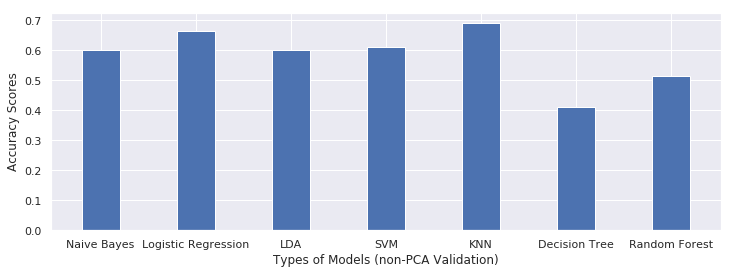

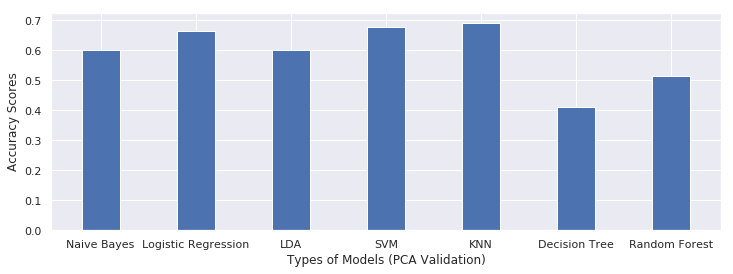

In [0]:
sns.set(rc={'figure.figsize':(12,4)})
x=["Naive Bayes","Logistic Regression","LDA","SVM","KNN","Decision Tree","Random Forest"]
y=[gb_valid_non_pca_acc,lr_valid_non_pca_acc,lda_valid_non_pca_acc,svm_valid_non_pca_acc,
   knn_valid_non_pca_acc,dt_valid_non_pca_acc,rf_valid_non_pca_acc
  ]
plt.bar(x,y,align='center',width=0.4) # A bar chart
plt.xlabel('Types of Models (non-PCA Validation)')
plt.ylabel('Accuracy Scores')
plt.show()

y=[gb_valid_pca_acc,lr_valid_pca_acc,lda_valid_pca_acc,svm_valid_pca_acc,
   knn_valid_pca_acc,dt_valid_pca_acc,rf_valid_pca_acc
  ]
plt.bar(x,y,align='center',width=0.4) # A bar chart
plt.xlabel('Types of Models (PCA Validation)')
plt.ylabel('Accuracy Scores')
plt.show()

**Test Sets**

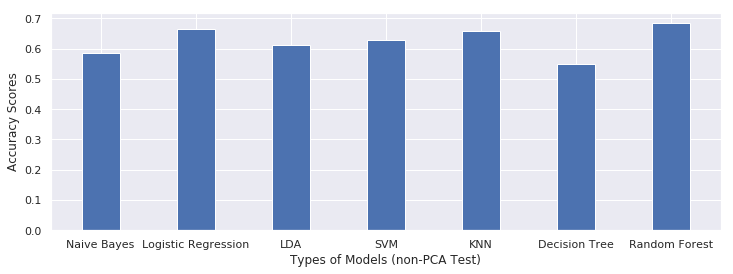

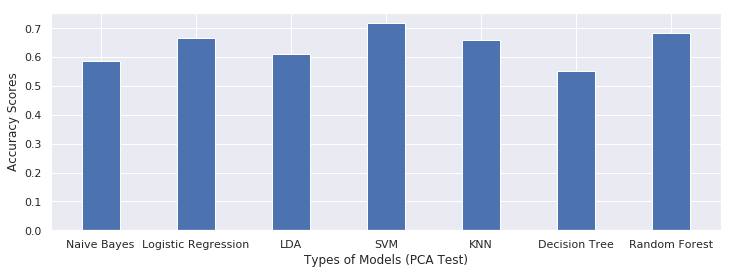

In [0]:
sns.set(rc={'figure.figsize':(12,4)})
x=["Naive Bayes","Logistic Regression","LDA","SVM","KNN","Decision Tree","Random Forest"]
y=[gb_test_non_pca_acc,lr_test_non_pca_acc,lda_test_non_pca_acc,svm_test_non_pca_acc,
   knn_test_non_pca_acc,dt_test_non_pca_acc,rf_test_non_pca_acc
  ]
plt.bar(x,y,align='center',width=0.4) # A bar chart
plt.xlabel('Types of Models (non-PCA Test)')
plt.ylabel('Accuracy Scores')
plt.show()

y=[gb_test_pca_acc,lr_test_pca_acc,lda_test_pca_acc,svm_test_pca_acc,
   knn_test_pca_acc,dt_test_pca_acc,rf_test_pca_acc
  ]
plt.bar(x,y,align='center',width=0.4) # A bar chart
plt.xlabel('Types of Models (PCA Test)')
plt.ylabel('Accuracy Scores')
plt.show()
